In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df=pd.read_csv(r"C:\Users\kazit\Downloads\islamic_bank_stock .csv")
df.sample(10)

,TRADING CODE,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
951,ISLAMIBANK,3/10/2002,3148.0,3150.0,3148.0,3149.50,8
2637,ISLAMIBANK,18-08-2009,558.0,560.5,553.0,558.00,52260
2443,ISLAMIBANK,27-10-2008,7448.0,7448.0,7220.0,7250.75,7902
3454,ISLAMIBANK,21-01-2014,34.4,34.7,34.2,34.50,293100
3332,ISLAMIBANK,11/7/2013,36.9,36.9,35.6,35.80,305500
2845,ISLAMIBANK,28-06-2010,666.0,675.0,650.5,658.50,511120
3395,ISLAMIBANK,23-10-2013,34.0,35.4,34.0,35.10,237600
3576,ISLAMIBANK,21-07-2014,24.7,25.3,24.6,25.10,603500
3673,ISLAMIBANK,22-12-2014,24.0,24.3,23.6,23.70,175861
3297,ISLAMIBANK,20-05-2013,36.1,37.0,36.0,36.80,888600


In [10]:
df

,TRADING CODE,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,ISLAMIBANK,1999-10-01,2050.0,2050.0,2010.0,2029.25,0
1,ISLAMIBANK,1999-11-01,2005.0,2005.0,2005.0,2005.00,0
2,ISLAMIBANK,1999-12-01,2007.0,2007.0,2006.0,2006.50,0
3,ISLAMIBANK,1999-01-13,2006.0,2007.0,2006.0,2006.00,0
4,ISLAMIBANK,1999-01-14,2005.0,2006.0,2000.0,2001.75,0
...,...,...,...,...,...,...,...
5734,ISLAMIBANK,2023-08-27,32.6,32.6,32.6,32.60,1
5735,ISLAMIBANK,2023-08-28,32.6,32.6,32.6,32.60,36
5736,ISLAMIBANK,2023-08-29,32.6,32.6,32.6,32.60,1
5737,ISLAMIBANK,2023-08-30,32.6,32.6,32.6,32.60,10


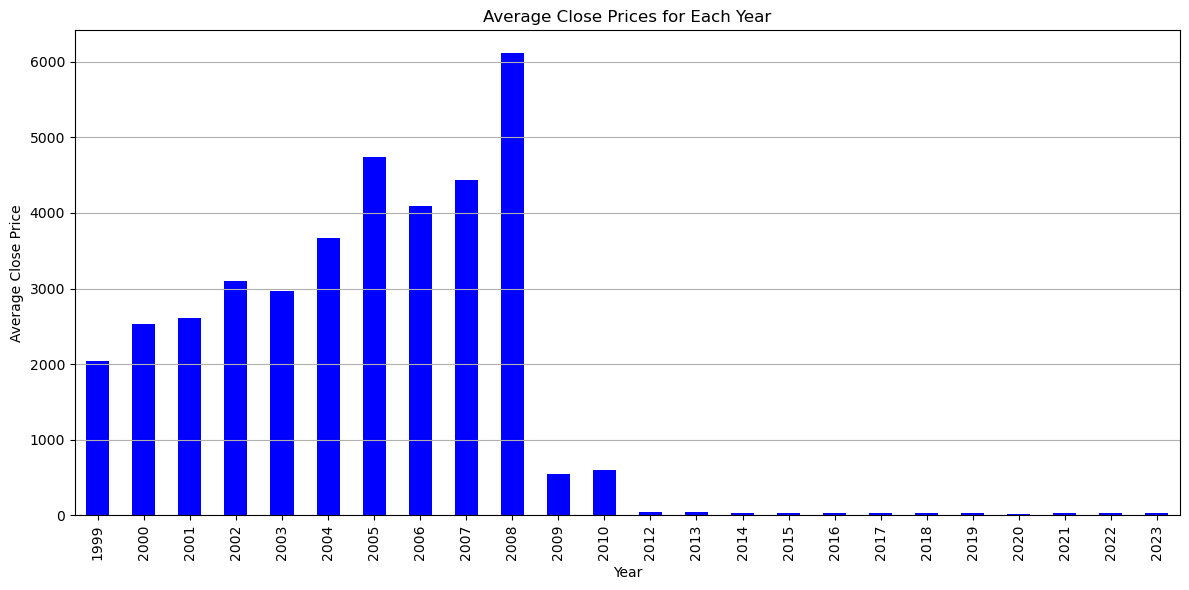

In [22]:

# Extract the year from the 'Date' column and create a new 'Year' column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group data by 'Year' and calculate the mean CLOSE for each year
yearly_mean_close = df.groupby('Year')['CLOSE'].mean()

# Create a bar chart for 'Year' vs. 'CLOSE'
plt.figure(figsize=(12, 6))
yearly_mean_close.plot(kind='bar', color='blue')

plt.title('Average Close Prices for Each Year')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


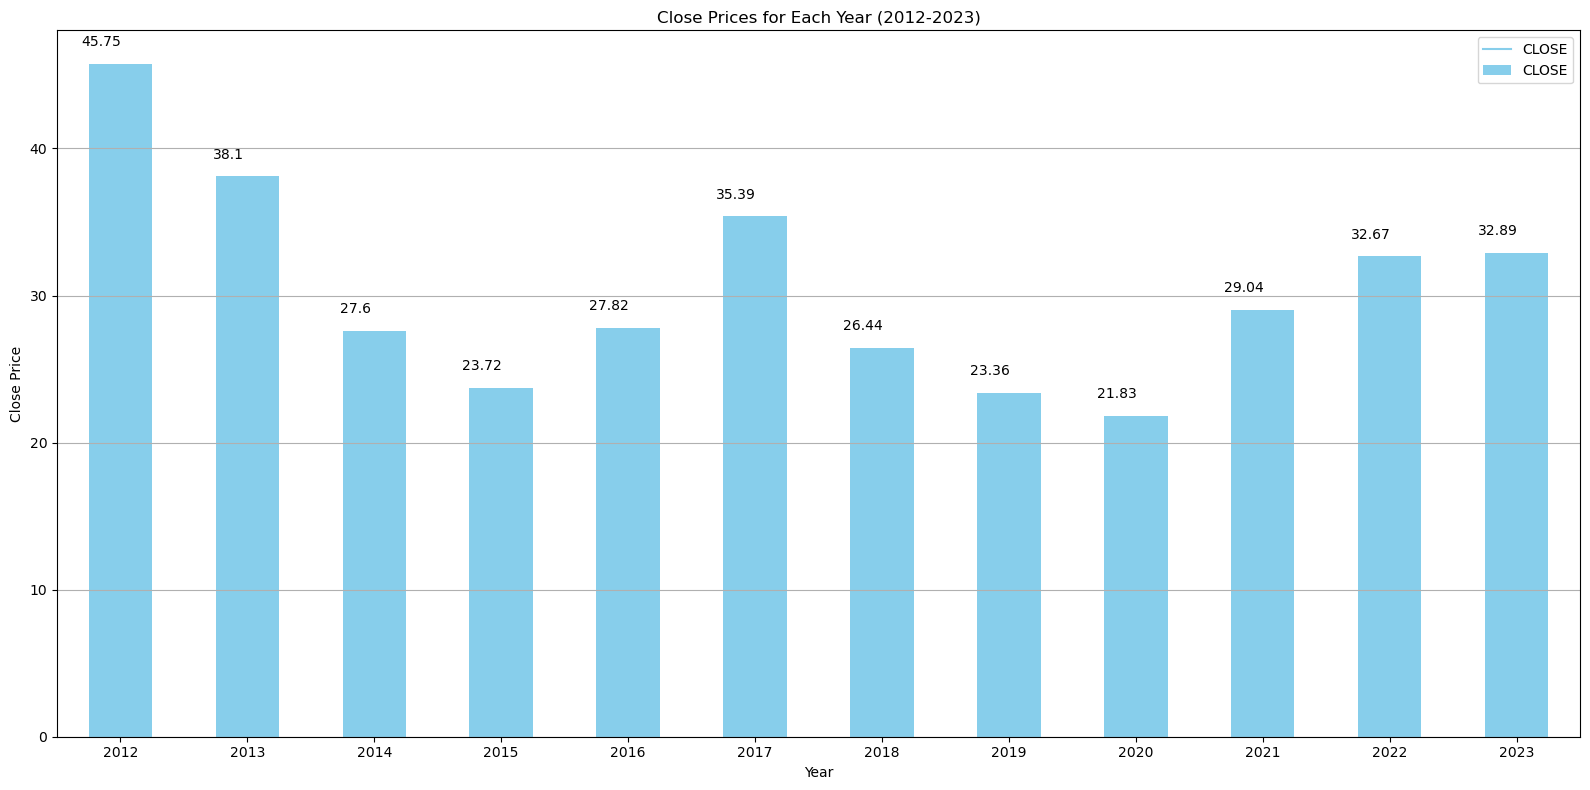

In [45]:


# Extract the year from the 'Date' column and create a new 'Year' column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Filter the DataFrame to include data only for the years 2012 to 2023
df_filtered = df[(df['Year'] >= 2012) & (df['Year'] <= 2023)]

# Group data by 'Year' and calculate the mean CLOSE for each year
yearly_mean_close = df_filtered.groupby('Year')['CLOSE'].mean()

# Create a bar chart for 'Year' vs. 'CLOSE' (average close prices)
plt.figure(figsize=(16, 8))
bars = yearly_mean_close.plot(kind='bar', color='Skyblue')
line = yearly_mean_close.plot(kind='line', color='Skyblue')

# Add value annotations on top of each bar
for bar, value in zip(bars.patches, yearly_mean_close):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, value + 1, str(round(value, 2)), ha='center', va='bottom', fontsize=10)

plt.title('Close Prices for Each Year (2012-2023)')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.grid(axis='y')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


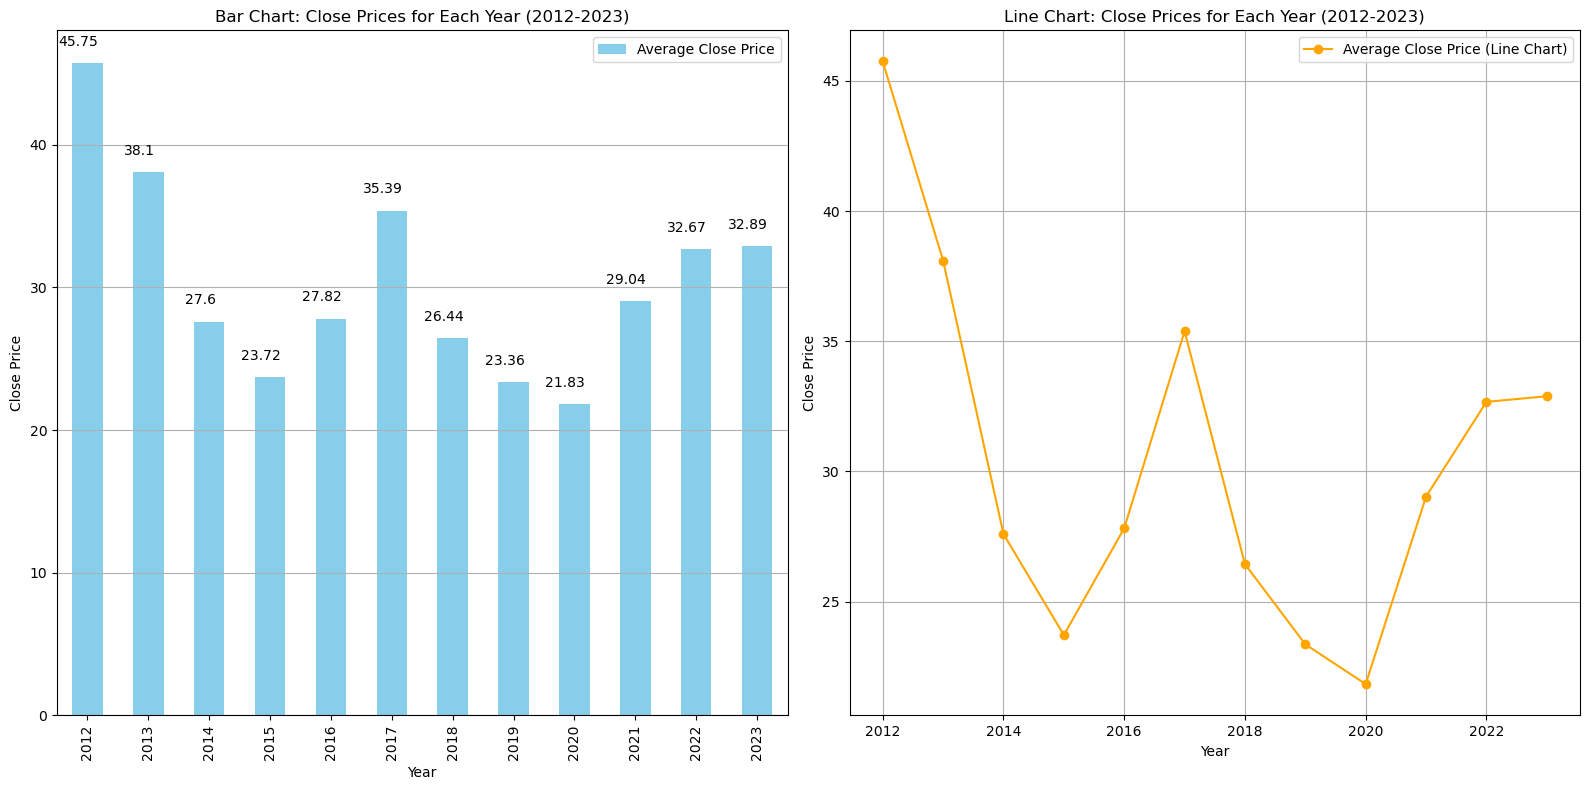

In [46]:
# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(16, 8))

# Subplot 1: Bar chart
plt.subplot(1, 2, 1)
bars = yearly_mean_close.plot(kind='bar', color='Skyblue', label='Average Close Price')

# Add value annotations on top of each bar
for bar, value in zip(bars.patches, yearly_mean_close):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, value + 1, str(round(value, 2)), ha='center', va='bottom', fontsize=10)

plt.title('Bar Chart: Close Prices for Each Year (2012-2023)')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.grid(axis='y')
plt.legend()

# Subplot 2: Line chart
plt.subplot(1, 2, 2)
yearly_mean_close.plot(kind='line', color='Orange', marker='o', label='Average Close Price (Line Chart)')

plt.title('Line Chart: Close Prices for Each Year (2012-2023)')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

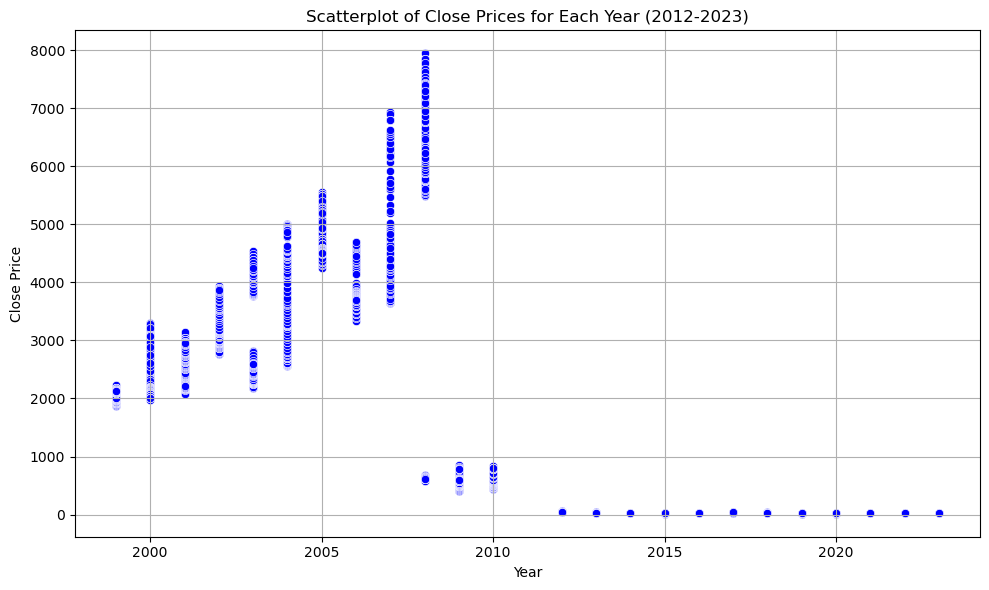

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year', y='CLOSE', color='blue', marker='o')

plt.title('Scatterplot of Close Prices for Each Year (2012-2023)')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

<AxesSubplot:>

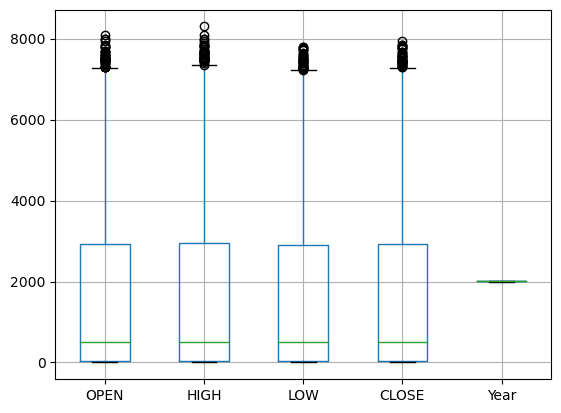

In [52]:
df.boxplot()

In [63]:
df.dtypes

TRADING CODE            object
Date            datetime64[ns]
OPEN                   float64
HIGH                   float64
LOW                    float64
CLOSE                  float64
VOLUME                  object
Year                     int64
dtype: object

In [68]:

# Replace commas with spaces and convert to integers
df['VOLUME'] = pd.to_numeric(df['VOLUME'].str.replace(',', ''), errors='coerce', downcast='integer')

C:\Users\kazit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


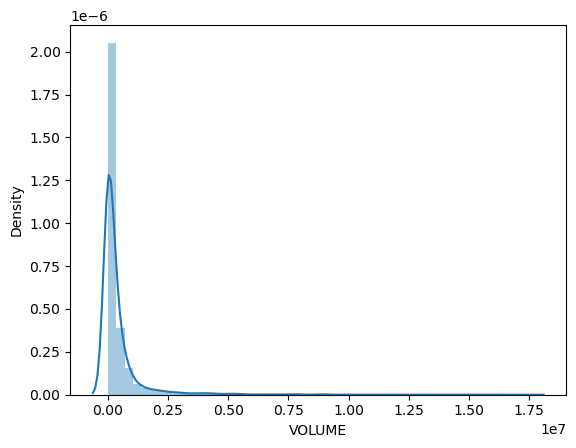

In [69]:
x=df['VOLUME']
ax = sns.distplot(x)
plt.show()

In [95]:
df.corr()

,OPEN,HIGH,LOW,CLOSE,DayOfYear
OPEN,1.000000,0.999883,0.999865,0.999813,0.025025
HIGH,0.999883,1.000000,0.999793,0.999904,0.025287
LOW,0.999865,0.999793,1.000000,0.999902,0.024844
CLOSE,0.999813,0.999904,0.999902,1.000000,0.025252
DayOfYear,0.025025,0.025287,0.024844,0.025252,1.000000


In [101]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the features (X) and target variable (y)
X = df[['OPEN']]
y = df['CLOSE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Sample values for new data

new_open = 6000 # Replace with the actual open price for your new data


# Now, you can use the trained model to predict the CLOSE price for the new data
new_data = np.array([[new_open]])
predicted_close = model.predict(new_data)
print(f"Predicted CLOSE Price: {predicted_close[0]}")


Mean Squared Error: 1933.6952850079356
Predicted CLOSE Price: 5932.644163690475


C:\Users\kazit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [102]:
from sklearn.metrics import r2_score

# Calculate the R-squared value
r_squared = r2_score(y_test, y_pred)

# Convert R-squared to a percentage
accuracy_percentage = r_squared * 100

print(f"R-squared (Accuracy Percentage): {accuracy_percentage:.2f}%")


R-squared (Accuracy Percentage): 99.95%


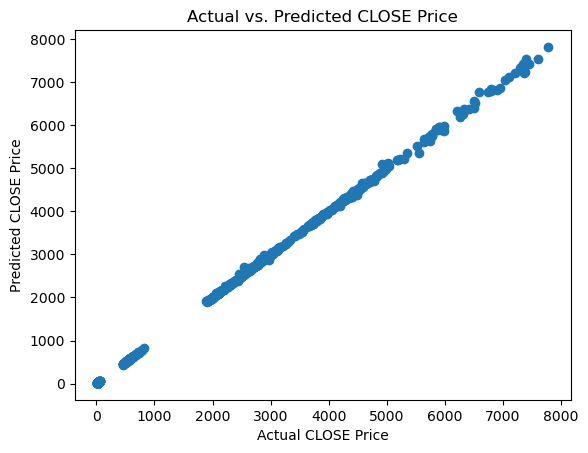

In [93]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual CLOSE Price")
plt.ylabel("Predicted CLOSE Price")
plt.title("Actual vs. Predicted CLOSE Price")
plt.show()